In [2]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from data_loader import DataLoader

W0919 08:48:17.298410 139699141822272 deprecation.py:323] From /home/mikew/miniconda3/envs/SfMLearner/lib/python3.7/site-packages/tensorflow/python/data/util/random_seed.py:58: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0919 08:48:17.427887 139699141822272 deprecation.py:323] From /HDD/Documents/UnsupervisedDepthAndPose/data_loader.py:50: DatasetV1.make_initializable_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.


[[b'2011_10_03_drive_0034_sync_03' b'0000003635']]


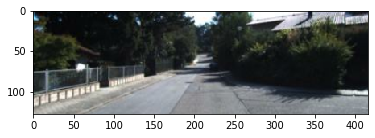

[[b'2011_10_03_drive_0034_sync_03' b'0000002855']]


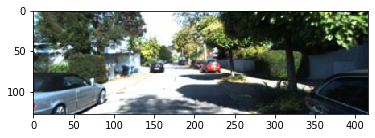

[[b'2011_10_03_drive_0034_sync_03' b'0000004005']]


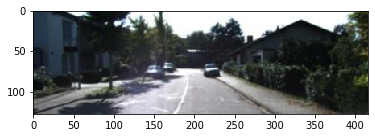

[[b'2011_09_30_drive_0028_sync_03' b'0000001577']]


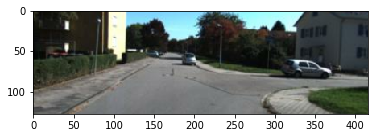

[[b'2011_10_03_drive_0034_sync_02' b'0000004079']]


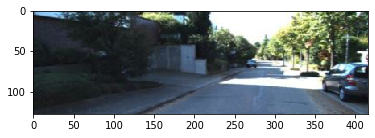

In [2]:
dataLoader = DataLoader(
    dataset_dir="/HDD/Documents/SfMLearner_data/",
    batch_size=1,
    num_sources=2,
    num_scales=4,
    num_parallel=4,
    seed=1,)
data = dataLoader.load_batch("train")
elem = data.get_next()

with tf.Session() as sess:
    sess.run(data.initializer)
    for _ in range(5):
        t,s,i,d = sess.run(elem)
        print(d) # printing data
        # print(i) # printing intrinsics
        plt.imshow(t[0])
        plt.show()

[[b'2011_10_03_drive_0034_sync_03' b'0000003635']]


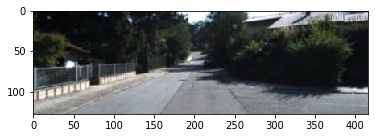

[[b'2011_10_03_drive_0034_sync_03' b'0000002855']]


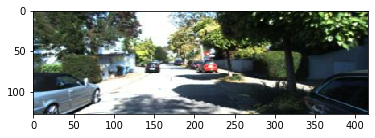

[[b'2011_10_03_drive_0034_sync_03' b'0000004005']]


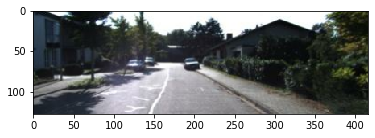

[[b'2011_09_30_drive_0028_sync_03' b'0000001577']]


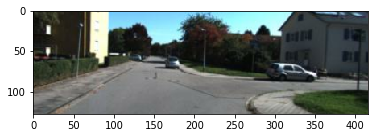

[[b'2011_10_03_drive_0034_sync_02' b'0000004079']]


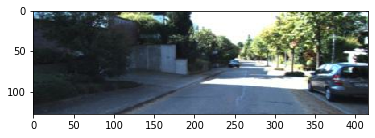

In [5]:
dataLoader = DataLoader(
    dataset_dir="/HDD/Documents/SfMLearner_data/",
    batch_size=1,
    num_sources=2,
    num_scales=4,
    num_parallel=4,
    seed=1,)
data = dataLoader.load_batch("train")
t,s,i,d = data.get_next()

with tf.Session() as sess:
    sess.run(data.initializer)
    for _ in range(5):
        target,data = sess.run([t,d])
        print(data) # printing data
        # print(i) # printing intrinsics
        plt.imshow(target[0])
        plt.show()

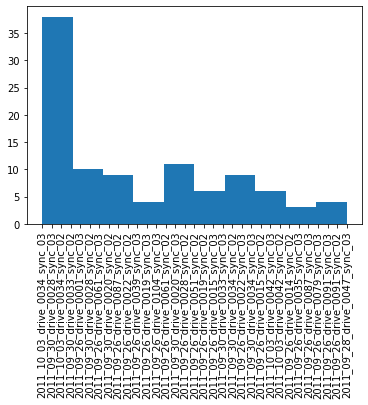

In [3]:
# Checks if the distribution of the folders follow 
# the distribution of number of files in the dataset
# You should expect a pick for: 
# - 2011_09_30_drive_0028_sync_03
# - 2011_09_30_drive_0028_sync_02
# - 2011_10_03_drive_0034_sync_03
# - 2011_10_03_drive_0034_sync_02

hist = [] 
with tf.Session() as sess:
    sess.run(data.initializer)
    for _ in range(100):
        t,s,i,d = sess.run(elem)
        hist.append(d[0][0])
plt.hist(hist)
plt.xticks(rotation=90);